In [1]:
# imports
import pandas as pd
import requests
import time
import datetime

In [2]:
# set display options 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [7]:
# read in all csv files
df1 = pd.read_csv('./data/5_18_pull1.csv')
df2 = pd.read_csv('./data/5_18_pull2.csv')
df3 = pd.read_csv('./data/5_18_pull3.csv')
df4 = pd.read_csv('./data/5_19_pull.csv')
df5 = pd.read_csv('./data/5_20_pull.csv')
df6 = pd.read_csv('./data/5_21_pull.csv')
df7 = pd.read_csv('./data/combined.csv')

In [8]:
# combine all datasets

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

In [9]:
df.shape

(34363, 27)

In [5]:
df.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,...,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
9995,bfcf75601ce84915b6f939eb279402f2,"D399--TAC-20-51726 - Customer Experience, DevO...",36C10B19Q0076,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",TECHNOLOGY ACQUISITION CENTER NJ (36C10B),2020-03-02,Special Notice,Special Notice,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'da...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '07724', 'city': 'EATONTOWN', 'cou...",{},NaN,https://beta.sam.gov/opp/bfcf75601ce84915b6f93...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",NaN
9996,bfbfb808060143578bf3d334e8ab8892,Vertical Construction Multiple Award Task Orde...,W9126G20R0050,DEPT OF DEFENSE,DEPT OF THE ARMY,US ARMY ENGINEER DISTRICT FT WORTH,2020-03-02,Presolicitation,Presolicitation,autocustom,...,NaN,"[{'fax': '', 'type': 'primary', 'email': 'scot...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '76102-6124', 'city': 'FORT WORTH'...","{'country': {'code': 'USA', 'name': 'UNITED ST...",NaN,https://beta.sam.gov/opp/bfbfb808060143578bf3d...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",NaN
9997,be15ccb61e2d4fd29a8e01dd3e7d4c99,5895--WestHaven pkg 24 - Orange Annex Activati...,36A77620Q0091,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",PCAC ACTIVATIONS (36A776),2020-03-02,Sources Sought,Sources Sought,autocustom,...,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'He...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '44131', 'city': 'INDEPENDENCE', '...",{},NaN,https://beta.sam.gov/opp/be15ccb61e2d4fd29a8e0...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",NaN
9998,bb420c29181a41b08443d8f1881f4928,B506--528A5-19-521 WASTE WATER TREATMENT PLANT...,36C24219Q0895,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",242-NETWORK CONTRACT OFFICE 02 (36C242),2020-03-02,Award Notice,Combined Synopsis/Solicitation,autocustom,...,"{'date': '2020-02-20', 'number': '36C24220P049...","[{'fax': None, 'type': 'primary', 'email': 'Co...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '12208', 'city': 'ALBANY', 'countr...",{},NaN,https://beta.sam.gov/opp/bb420c29181a41b08443d...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",NaN
9999,b7fe38edaf674d35971fdd5eb75f6174,Loader Mounted Snow Blower,FA452820QDC01,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA4528 5 CONS LGCP,2020-03-02,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,...,NaN,"[{'fax': '701-723-2696', 'type': 'primary', 'e...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '58705', 'city': 'MINOT AFB', 'cou...","{'city': {'code': 'ND-01', 'name': 'Minot AFB'...",NaN,https://beta.sam.gov/opp/b7fe38edaf674d35971fd...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",['https://beta.sam.gov/api/prod/opps/v3/opport...


In [14]:
# find and drop duplicates
print('Number of duplicated rows:', df.loc[df.duplicated()].shape[0])

# df = df.drop_duplicates()

Number of duplicated rows: 19188


In [24]:
# check number of rows after removing duplicates

df.shape[0]

2704

In [15]:
# export dataframe into csv file

df.to_csv('./data/combined.csv', index=False)

## EDA

In [26]:
# inspect data
# inspect data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   noticeId                   2704 non-null   object 
 1   title                      2704 non-null   object 
 2   solicitationNumber         2679 non-null   object 
 3   department                 2703 non-null   object 
 4   subTier                    2702 non-null   object 
 5   office                     2703 non-null   object 
 6   postedDate                 2704 non-null   object 
 7   type                       2704 non-null   object 
 8   baseType                   2704 non-null   object 
 9   archiveType                2704 non-null   object 
 10  archiveDate                2704 non-null   object 
 11  typeOfSetAsideDescription  881 non-null    object 
 12  typeOfSetAside             881 non-null    object 
 13  responseDeadLine           2145 non-null   object

#### Missing Data

In [27]:
import matplotlib.pyplot as plt

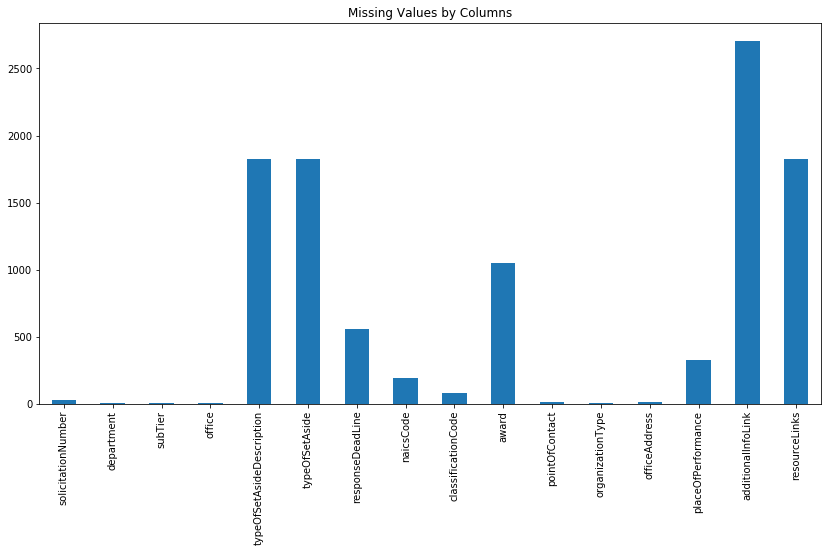

In [28]:
# create a plot that shows columns with missing values

# columns with missing values
cols_w_missings = df.loc[:, df.isna().sum() > 0]

# plot missing data
# set figsize
plt.figure(figsize=(14, 7))
# set title
plt.title('Missing Values by Columns')   
# plot the number of missing values in each column
cols_w_missings.isna().sum().plot(kind='bar');

In [29]:
# prints
print(f'Number of observations: {df.shape[0]}')
print('')
print('Number of missing values:')
for i in range(len(cols_w_missings.columns)):
    print(f'    {cols_w_missings.columns[i]} column\
    = {cols_w_missings[cols_w_missings.columns[i]].isna().sum()}')

Number of observations: 2704

Number of missing values:
    solicitationNumber column    = 25
    department column    = 1
    subTier column    = 2
    office column    = 1
    typeOfSetAsideDescription column    = 1823
    typeOfSetAside column    = 1823
    responseDeadLine column    = 559
    naicsCode column    = 193
    classificationCode column    = 79
    award column    = 1048
    pointOfContact column    = 15
    organizationType column    = 1
    officeAddress column    = 9
    placeOfPerformance column    = 326
    additionalInfoLink column    = 2704
    resourceLinks column    = 1823


In [30]:
# additionalInfoLink column has no values
# drop additionalInfoLink column
df.drop('additionalInfoLink', axis=1, inplace=True)

#### Tokenizing title column

In [38]:
# inspect title column

df['title'].head(15)

0                                                                                                                                                 40--ROPE,FIBROUS
1                                                                                                           6515--iPack Rx Unit Dose Packager | Marion IL VAMC    
2                                                      CMc Services for the Philadelphia Custom House Mechanical and Plumbing Renovation Project, Philadelphia, PA
3                                                                                                               61--CABLE AND CONDUIT A, IN REPAIR/MODIFICATION OF
4                                                                                                                                          45--FEMALE URINARY DIVE
5                                                                                                                                      "Demo" Cryo-Ultra-Microtome
6                     

In [39]:
df['title'].tail(15)

914                                                                                                                                                         25--STEERING WHEEL
919                                                                                                                                                    15--PLATE,STRUCTURAL,AI
922                                                                                                                                                    61--WIRING HARNESS,BRAN
929                                                                                                                                                    10--BAYONET RECEIVER AS
930                                                                                                                                                    60--CABLE ASSEMBLY,FIBE
932                                                                                                                          

In [40]:
from nltk.tokenize import RegexpTokenizer

In [41]:
# define function to tokenize a column

def tokenizer_function(column):
    """
    Takes in a text column
        tokenizes the text in each row
        using pattern [[a-zA-Z]\w+]
        which matches every lowercase and upperase character between a-z that are word characters
    Returns list of strings
    """
    
    # instantiate empty list of tokenized text
    texts = []
    
    # instantiate tokenizer
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
    
    # create for loop to tokenize each row and add the list of tokens to texts
    for text in column:
        tokens = tokenizer.tokenize(text)
        
        # transform tokens into lower case strings
        tokens = [token.lower() for token in tokens]
        texts.append(tokens)
    return pd.Series(texts)

In [42]:
# call tokenizer function on df['title']

tokenizer_function(df['title'])

0                                                                                                                                                                          [rope, fibrous]
1                                                                                                                                      [ipack, rx, unit, dose, packager, marion, il, vamc]
2                                                                 [cmc, services, for, the, philadelphia, custom, house, mechanical, and, plumbing, renovation, project, philadelphia, pa]
3                                                                                                                                      [cable, and, conduit, in, repair, modification, of]
4                                                                                                                                                                  [female, urinary, dive]
                                                                 

**Explore the Type of Award Notices

In [43]:
# find count unique values of df['type']
df['type'].value_counts(normalize=True)

Combined Synopsis/Solicitation    0.340976
Solicitation                      0.178624
Award Notice                      0.144601
Presolicitation                   0.143861
Sources Sought                    0.098373
Special Notice                    0.054364
Justification                     0.036243
Sale of Surplus Property          0.002959
Name: type, dtype: float64

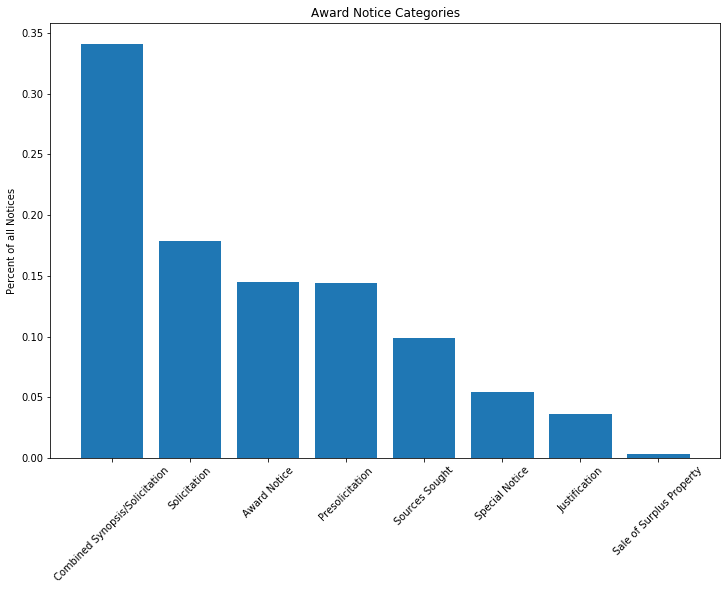

In [44]:
# find count unique values of df['type']

fig = plt.figure(figsize=(12, 8))
plt.title('Award Notice Categories')
plt.xticks(rotation=45)
plt.ylabel('Percent of all Notices')
plt.bar(df['type'].value_counts().index, df['type'].value_counts(normalize=True));

# xticks rotation source: https://kite.com/python/answers/how-to-rotate-date-ticks-using-matplotlib-in-python

In [45]:
# combine solicitation notices with combined synopsis and soliciation notices
# this gives back the percent of notices that solicit applications for award

print(f"Percent of all soliciation notices: \
{round(df['type'].value_counts(normalize=True)['Combined Synopsis/Solicitation'] + df['type'].value_counts(normalize=True)['Solicitation'], 4)}\
")

Percent of all soliciation notices: 0.5196


*Observation:* close to 50% of all Notices is a combined synopsis and solicitation, followed by the 22% of award notices. When we combine all types of solicitations, 56.8% of all notices is soliciting for a submission. 

In [ ]:
# look at types of set aside, especially among the solicitations
# check if we can see the awardee names, city/ state of business location